<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center><font color= #8A0829> <font size = 6>Microestructura y sistemas de trading</font> </font> <br><br>
<center><Strong> <font size = 3> Tarea: </font> </Strong>  Herramienta de Trading<br><br>
<center><Strong> <font size = 3> Profesor: </font>  </Strong> Francisco Muñoz <br><br>
<center><Strong> <font size = 3> Fecha de entrega:  </font> </Strong> 23 de febrero de 2020<br><br>
<center><Strong> <font size = 3> Nomre: </font> </Strong> Carlos Elias Nuño Tiscareño

#### Importamos las librerias que utilizaremos a lo largo del cogido

In [87]:
import numpy as np
import pyfolio as pf
import pandas as pd
import funciones as fn
import visualizaciones as vs
import matplotlib.pyplot as plt
OA_Ak = '15f72a29c535bc9eb4d8f9c3267c7a85-e152e24cb184171e7d1b098219e4c303' 
OA_In = "XAU_USD"  
OA_Gn = "D"  
fini = pd.to_datetime("2017-02-01").tz_localize('GMT') 
ffin = pd.to_datetime('today').tz_localize('GMT') 

stock = fn.f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn,
                             p3_inst=OA_In, p4_oatk=OA_Ak, p5_ginc=4900)

#### Ponemos el activo que deseamos tener informacion y las fechas que utilizaremos para analizar

In [63]:
stock.head()

,TimeStamp,Open,High,Low,Close
0,2017-01-31 21:00:00+00:00,1212.210,1213.290,1198.170,1208.932
1,2017-02-01 21:00:00+00:00,1209.020,1225.388,1208.486,1215.778
2,2017-02-02 21:00:00+00:00,1215.685,1221.497,1206.992,1219.082
3,2017-02-03 21:00:00+00:00,1219.190,1220.594,1218.928,1220.594
4,2017-02-05 21:00:00+00:00,1220.190,1235.648,1219.276,1235.062


#### Hacmeos la columna de TimeStamp index

In [64]:
stock = stock.set_index(stock.TimeStamp)
stock = stock.drop(columns=['TimeStamp'])

In [65]:
stock.head()

,Open,High,Low,Close
TimeStamp,,,,
2017-01-31 21:00:00+00:00,1212.210,1213.290,1198.170,1208.932
2017-02-01 21:00:00+00:00,1209.020,1225.388,1208.486,1215.778
2017-02-02 21:00:00+00:00,1215.685,1221.497,1206.992,1219.082
2017-02-03 21:00:00+00:00,1219.190,1220.594,1218.928,1220.594
2017-02-05 21:00:00+00:00,1220.190,1235.648,1219.276,1235.062


#### Obtenenos una descripcion general del activo

In [66]:
stock.describe()

,Open,High,Low,Close
count,946.000000,946.000000,946.000000,946.000000
mean,1321.536489,1327.493625,1315.896658,1321.900459
std,101.268722,102.386436,100.317066,101.521831
min,1173.693000,1182.195000,1160.208000,1173.794000
25%,1251.932000,1256.992000,1246.471500,1252.582500
50%,1291.189500,1295.083500,1285.554500,1291.145000
75%,1341.344250,1348.383500,1335.799250,1341.980500
max,1602.784000,1612.979000,1599.607000,1612.970000


#### Graficamos el precio del activo

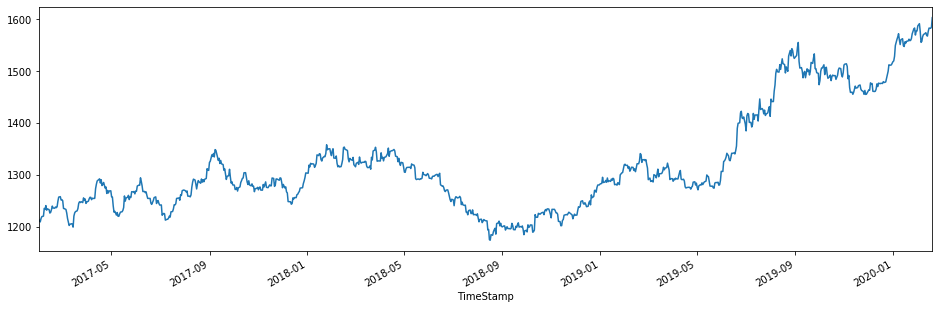

In [67]:
stock['Open'].plot(figsize=(16,5))

#### Obtenemos los renornos de los precios

In [68]:
stock['returns'] = (stock['Close'] / stock['Close'].shift(1) ) - 1
stock.head()

,Open,High,Low,Close,returns
TimeStamp,,,,,
2017-01-31 21:00:00+00:00,1212.210,1213.290,1198.170,1208.932,NaN
2017-02-01 21:00:00+00:00,1209.020,1225.388,1208.486,1215.778,0.005663
2017-02-02 21:00:00+00:00,1215.685,1221.497,1206.992,1219.082,0.002718
2017-02-03 21:00:00+00:00,1219.190,1220.594,1218.928,1220.594,0.001240
2017-02-05 21:00:00+00:00,1220.190,1235.648,1219.276,1235.062,0.011853


#### Se crea un histograma de los retornos

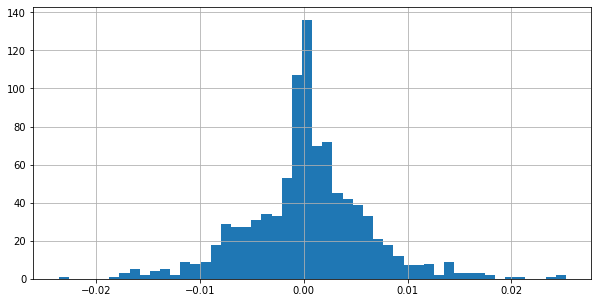

In [69]:
stock['returns'].hist(bins=50, figsize=(10,5))

#### Se grafican los retonos para tenerlos mas visuales

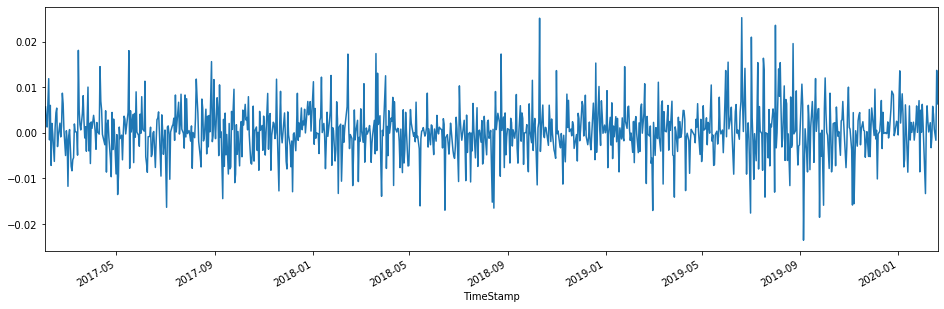

In [70]:
stock['returns'].plot(figsize=(16,5))

#### Promedio de los retornos del precio

In [77]:
avg_returns_d = stock['returns'].mean()
avg_returns_d

0.00032230740455395487

#### Promedio anual de los retornos

In [78]:
avg_returns_a = stock['returns'].mean() * 250
avg_returns_a

0.08057685113848871

#### Se imprime el retorno en porcentaje

In [73]:
print (str(round(avg_returns_a, 5) * 100) + ' %')

8.058 %


#### En una grafica visualizamos los retornos que se tuvieron en los años analizados

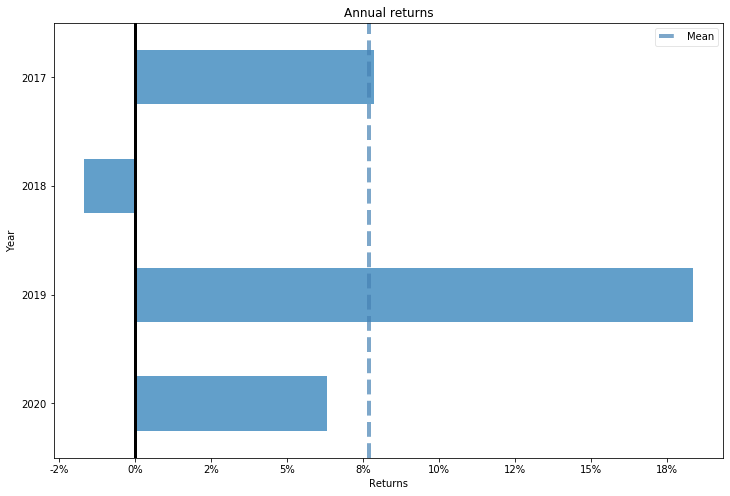

In [79]:
pf.plot_annual_returns(stock['returns'],figsize=(12,8))

#### En este histograma podemos ver en que parte se encuentran con mayor frecuencia los retornos de los meses

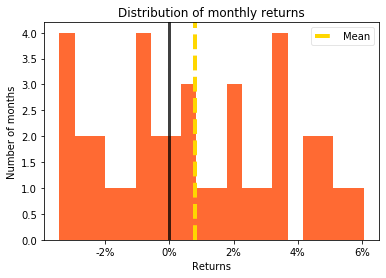

In [80]:
pf.plot_monthly_returns_dist(stock['returns'])

#### En una tabla vemos los retornos de todos los meses analizados y de esta forma sabremos si hay algun patron en algun mes

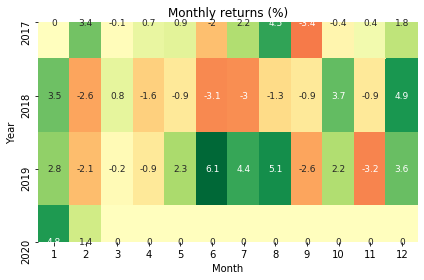

In [81]:
pf.plot_monthly_returns_heatmap(stock['returns'])
plt.tight_layout()

#### Ahora visualizamos los retornos de las diferentes frecuencias (diario, semanal y mensual)

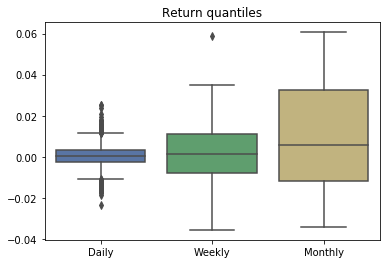

In [82]:
pf.plot_return_quantiles(stock['returns']);

#### En la grafica de los precios ponemos la media de ellos

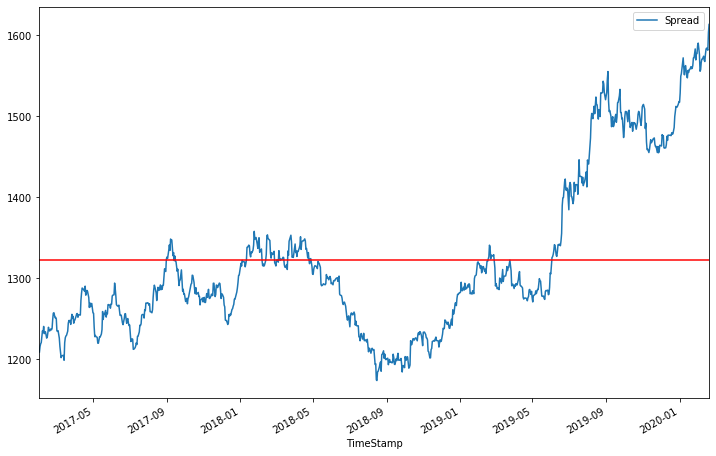

In [84]:
spread = stock['Close'] 
spread.plot(label='Spread',figsize=(12,8))
plt.axhline(spread.mean(),c='r')
plt.legend()

#### Creamos una funcion para obtener el Z Score

In [85]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

#### Graficamos el Z Score

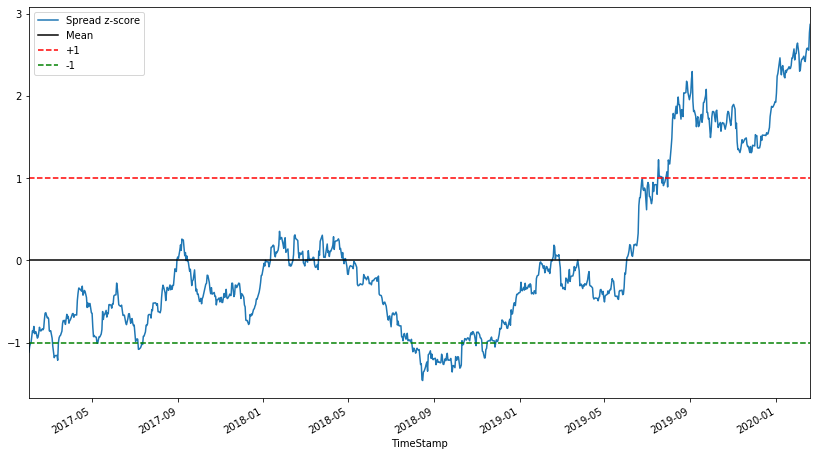

In [88]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, c='r', ls='--')
plt.axhline(-1.0, c='g', ls='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);